#### 선형회귀
- 구성된 feature 값들에서 가장 비용이 적게 드는 회귀선을 찾아 예측값의 기준으로 사용하는 머신러닝 알고리즘입니다
- 분류 알고리즘과 달리 범주형 예측값이 아닌 회귀선상에서 얻어낸 연속값 중 하나의 예측값을 출력으로 합니다.

- 예시 
    - __실제값을 Y=4X+6 시뮬레이션하는 데이터값 생성__

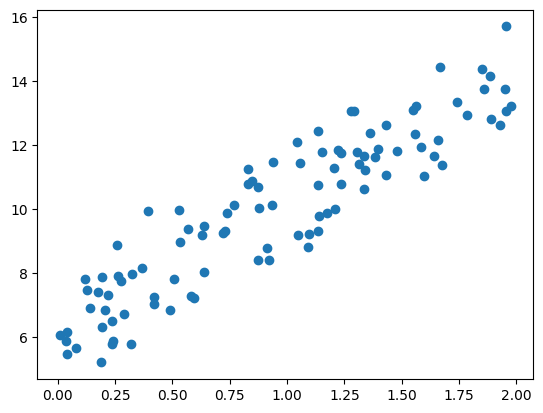

In [69]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # theme

# 난수 발생을 위한 준비
np.random.seed(0)

# np.random.rand 0~1사이의 난수 발생(소수점 포함) - 균일 분포가 특징
X = 2*np.random.rand(100, 1)

# X

# np.random.randn(100, 1) : 가우시안 정규분포에서 난수 발생 - 음수 발생 가능
y = 4*X + 6 + np.random.randn(100, 1)
# y

plt.scatter(X, y)

In [70]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01) :
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y0 = np.dot(X, w1.T) + w0
    diff = y - y0
    w0_factors = np.ones((N, 1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

def gradient_descent_steps(X, y, iters=1000) :
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    for i in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [71]:
# 코스트값이 가장 작은값으로 계산된 x1, x0 - w0은 기울기, w1 : 절편
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0, 0], w0[0, 0]))

w1:4.022 w0:6.162


In [72]:
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

Gradient Descent Total Cost : 0.9935


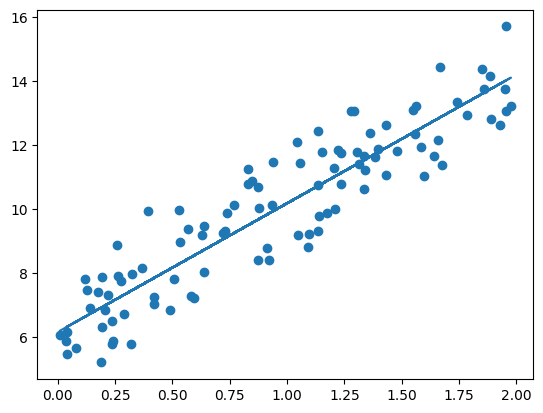

In [73]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### 회귀 평가지표
- MAE : Mean Absolute Error 이며 실제값과 예측값의 차이를 절대값으로 변환해 평균한것
- MSE : Mean Squared Error, 실제값과 예측값의 차이를 제곱해 평균한 것
- MSLE : MSE 값에 로그를 적용한 것입니다. 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다.
- RMSE : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있습니다. MSE 값에 루트를 씌운것입니다.
- RMSLE : RMSE에 로그를 적용한 것. 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다.
- R2 : 분산기반으로 예측성능을 평가합니다. 실제값의 분산대비 예측값의 분산 비율을 지표로 하며, 1에 가까운 값일수록 정확도가 높습니다.

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

In [75]:
# boston 데이터셋 로드
boston = load_boston()
# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
# boston dataset의 target이 주택 가격. 이를 PRICE 컬럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 : ', bostonDF.shape)

Boston 데이터셋 크기 :  (506, 14)


In [76]:
bostonDF.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


- CRIM : 지역별 범죄 발생률
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM : 거주할 수 있는 방 갯수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율

### 각 컬럼별로 주택가격에 미치는 영향도를 조사

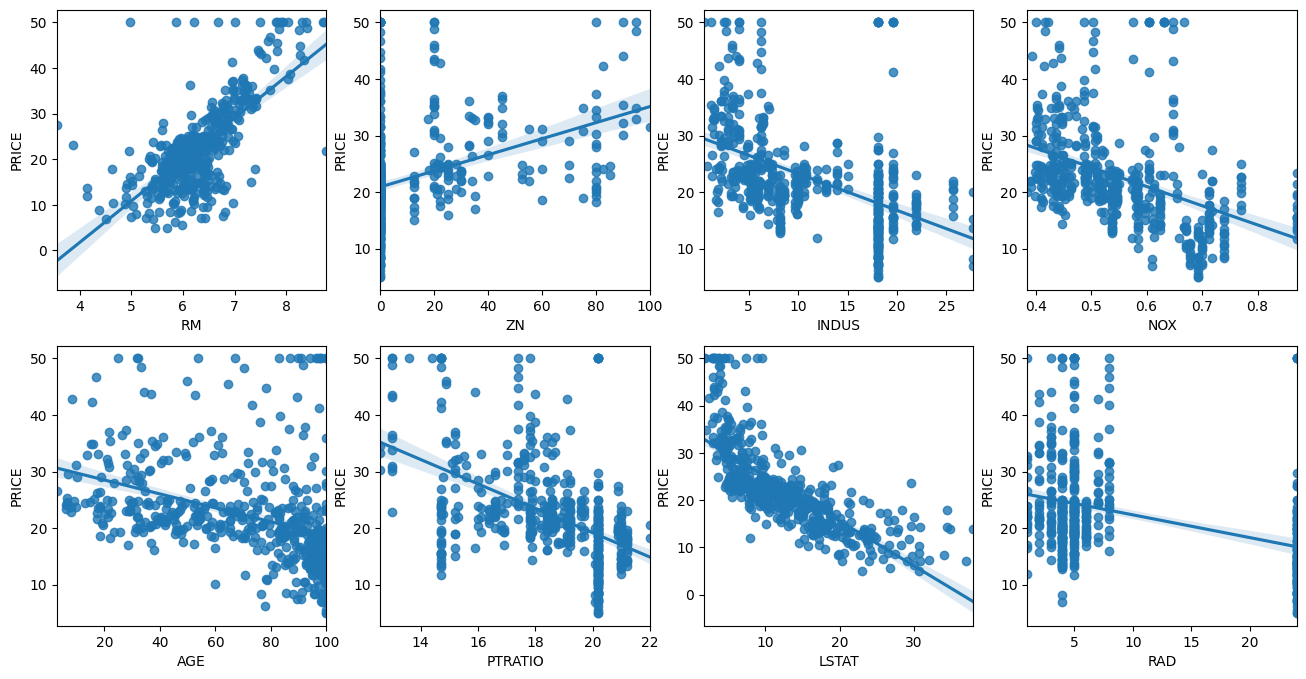

In [77]:
# 서브 차트를 하나에 모아놓을 수 있는 차트 구조 생성(2행 4열)
fig, axs = plt.subplots(figsize=(16, 8), nrows=2, ncols=4)
# axs : 각 차트의 위치를 저장한 2차원 리스트
# axe[0][0] : 첫번째 차트의 위치저장

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
# 컬럼명이 들은 리스트의 인덱스 값들로 표시될 차트의 행과 열을 지정
for i, feature in enumerate(lm_features) :
    row = int(i/4)
    col = i%4
    # 지정된 행과 열로 회귀선 차트 표시
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
Y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_target, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_preds = lr.predict(X_test)

lr.predict(X_test[0:1])

array([11.37721785])

In [80]:
# 각 회귀 계수들과 절편값을 아래와 같이 계산
print("절편 값 : ", lr.intercept_)
print("회귀계수 :\n", np.round(lr.coef_, 1))

절편 값 :  42.604605189032995
회귀계수 :
 [ -0.1   0.    0.    2.5 -22.    3.3   0.   -1.5   0.4  -0.   -1.    0.
  -0.6]


In [82]:
# MSE : Mean Squared Error, 실제값과 예측값의 차이를 제곱해 평균한 것
mse = mean_squared_error(Y_test, Y_preds)
# RMSE : MSE같은 오류의 제곱을 구하므로 실제 오류 평균보다 커지는 특성이 있음
# MSE 값에 루트를 씌운 것
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# R2 : 분산기반으로 예측성능을 평가합니다. 실제값의 분산 대비 예측값의 분산비율을 지표로 하며, 1에 가까울수록 정확도가 높습니다.
print('Variance score : {0:.3f}'.format(r2_score(Y_test, Y_preds)))

MSE : 15.664, RMSE : 3.958
Variance score : 0.818


### sklearn Scoring함수에 회귀 평가 적용시 유의사항

#### cross_val_score와 같은 scoring 함수에 회귀 평가 자료를 적용할 때 유의사항
- MAE의 sklearn의 scoring 파라미터 값은 neg_mean_absolute_error 입니다.
- 이는 음수값을 가진다는 의미인데 MAE는 절대값의 합이므로 음수가 될 수 없습니다.
- Scoring함수에 neg_mean_absolute_error를 적용하여 음수값을 반환하는 이유는 sklearn의 Scoring함수가 score값이 클수록 좋은 평가결과로 자동평가하기 때문입니다.
- 따라서 -1을 원래의 평가 지표값에 곱해서 음수를 만들어 작은 오류값이 더큰 숫자로 인식하게 합니다. 예를들어 10>1과 -1>-10의 차이입니다.
- neg_mean_absolute_error 값은 -1을 붙여서 의미를 찾는 것이 바람직합니다.

In [86]:
from sklearn.model_selection import cross_val_score
# cross_val_score()로 5Fold셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구합니다.
neg_mse_scores = cross_val_score(lr, X_data, Y_target, scoring='neg_mean_squared_error', cv=5)

# np.sqrt() : 연산
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829
